# extreme gradient boost 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier

from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("Wine.csv")


In [7]:
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [8]:
df["Customer_Segment"].value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

<Axes: xlabel='Customer_Segment', ylabel='count'>

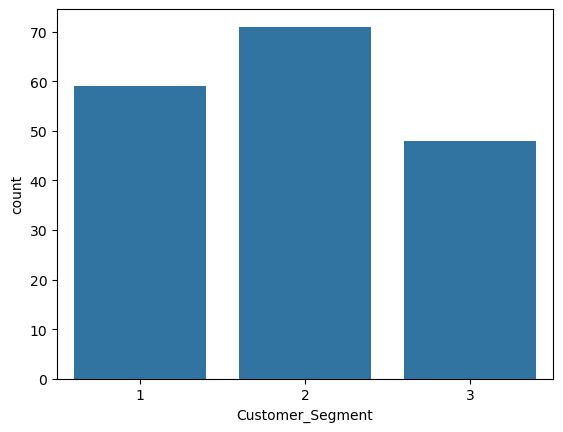

In [9]:
sns.countplot(x =df["Customer_Segment"])

In [10]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<Axes: >

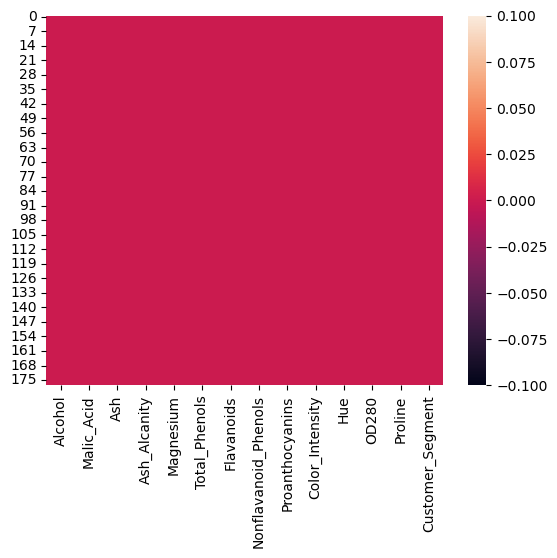

In [12]:
sns.heatmap(df.isna()) # no null values

In [14]:
x =df.iloc[:,:-1]
y =df["Customer_Segment"]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state =42)


In [16]:
# build individual decision tree model

In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [20]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

In [21]:
print("training accuracy ",dt.score(x_train,y_train))
print("testing accuracy ",dt.score(x_test,y_test))

training accuracy  1.0
testing accuracy  0.9444444444444444


In [22]:
# model is overfitted

In [23]:
lg = LogisticRegression()
lg.fit(x_train,y_train)


LogisticRegression()

In [26]:
y = lg.predict(x_test)

In [28]:
print("training accuracy ",lg.score(x_train,y_train))
print("testing accuracy",lg.score(x_test,y_test))

training accuracy  0.9596774193548387
testing accuracy 0.9814814814814815


In [ ]:
# write the usee define dfujctioj